In [1]:
import tensorflow as tf

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
% matplotlib inline

UsageError: Line magic function `%` not found.


In [3]:
df1 = pd.read_csv('./datasets/CPU_r23_v2.csv')
df2 = pd.read_csv('./datasets/CPU_benchmark_v4.csv')
df3 = pd.read_csv('./datasets/GPU_benchmarks_v7.csv')
df4 = pd.read_csv('./datasets/GPU_scores_graphicsAPIs.csv')

In [4]:
df3.head()

,gpuName,G3Dmark,G2Dmark,price,gpuValue,TDP,powerPerformance,testDate,category
0,GeForce RTX 3090 Ti,29094,1117,2099.99,13.85,450.0,64.65,2022,Unknown
1,GeForce RTX 3080 Ti,26887,1031,1199.99,22.41,350.0,76.82,2021,Desktop
2,GeForce RTX 3090,26395,999,1749.99,15.08,350.0,75.41,2020,Desktop
3,Radeon RX 6900 XT,25458,1102,1120.31,22.72,300.0,84.86,2020,Desktop
4,GeForce RTX 3080,24853,1003,999.00,24.88,320.0,77.66,2020,Desktop


In [5]:
df4.head()

,Manufacturer,Device,CUDA,Metal,OpenCL,Vulkan
0,Nvidia,GeForce RTX 3090 Ti,260346.0,NaN,229738.0,141134.0
1,Nvidia,A100 80GB PCIe,259828.0,NaN,214586.0,NaN
2,Nvidia,A100-PCIE-80GB,256292.0,NaN,207124.0,NaN
3,Nvidia,GeForce RTX 3090,238123.0,NaN,204921.0,138859.0
4,Nvidia,A100-SXM4-40GB,237220.0,NaN,190489.0,NaN


In [8]:
df3.describe()

,G3Dmark,G2Dmark,price,gpuValue,TDP,powerPerformance,testDate
count,2317.000000,2317.000000,553.00000,553.000000,692.000000,692.000000,2317.000000
mean,2046.512732,352.051791,439.74660,10.405515,98.968064,34.103634,2013.956841
std,3758.139908,226.631283,763.59252,10.879097,82.878671,36.604351,3.911129
min,1.000000,7.000000,17.50000,0.000000,4.400000,0.630000,2009.000000
25%,130.000000,171.000000,109.99000,1.690000,35.000000,7.592500,2010.000000
50%,649.000000,307.000000,209.00000,6.580000,75.000000,20.825000,2013.000000
75%,1953.000000,494.000000,435.00000,16.430000,147.000000,49.120000,2017.000000
max,29094.000000,1117.000000,8999.00000,69.730000,500.000000,204.000000,2022.000000


In [10]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2317 entries, 0 to 2316
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gpuName           2317 non-null   object 
 1   G3Dmark           2317 non-null   int64  
 2   G2Dmark           2317 non-null   int64  
 3   price             553 non-null    float64
 4   gpuValue          553 non-null    float64
 5   TDP               692 non-null    float64
 6   powerPerformance  692 non-null    float64
 7   testDate          2317 non-null   int64  
 8   category          2317 non-null   object 
dtypes: float64(4), int64(3), object(2)
memory usage: 163.0+ KB


<AxesSubplot:>

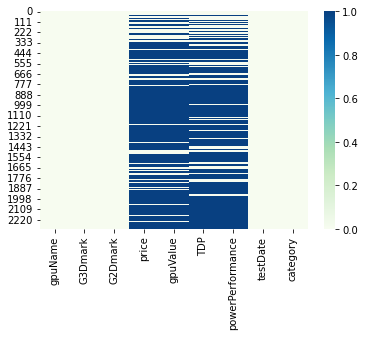

In [20]:
sns.heatmap(df3.isnull(), cmap='GnBu')

<AxesSubplot:xlabel='G2Dmark', ylabel='price'>

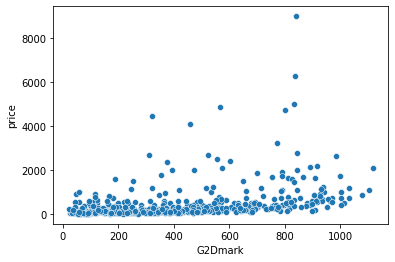

In [24]:
sns.scatterplot(x='G2Dmark',y='price',data=df3)

<AxesSubplot:xlabel='G3Dmark', ylabel='price'>

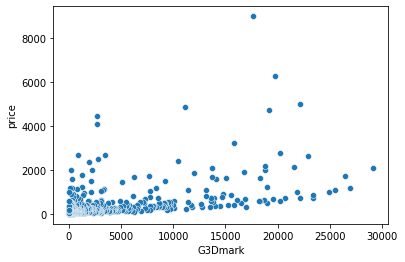

In [26]:
sns.scatterplot(x='G3Dmark',y='price',data=df3)

In [27]:
df3.columns

Index(['gpuName', 'G3Dmark', 'G2Dmark', 'price', 'gpuValue', 'TDP',
       'powerPerformance', 'testDate', 'category'],
      dtype='object')

In [28]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2317 entries, 0 to 2316
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gpuName           2317 non-null   object 
 1   G3Dmark           2317 non-null   int64  
 2   G2Dmark           2317 non-null   int64  
 3   price             553 non-null    float64
 4   gpuValue          553 non-null    float64
 5   TDP               692 non-null    float64
 6   powerPerformance  692 non-null    float64
 7   testDate          2317 non-null   int64  
 8   category          2317 non-null   object 
dtypes: float64(4), int64(3), object(2)
memory usage: 163.0+ KB


In [29]:
df3.count()

gpuName             2317
G3Dmark             2317
G2Dmark             2317
price                553
gpuValue             553
TDP                  692
powerPerformance     692
testDate            2317
category            2317
dtype: int64

In [34]:
gpu_work = df3[df3['price'].isnull()==False]

In [35]:
gpu_work.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 553 entries, 0 to 2298
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gpuName           553 non-null    object 
 1   G3Dmark           553 non-null    int64  
 2   G2Dmark           553 non-null    int64  
 3   price             553 non-null    float64
 4   gpuValue          553 non-null    float64
 5   TDP               387 non-null    float64
 6   powerPerformance  387 non-null    float64
 7   testDate          553 non-null    int64  
 8   category          553 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 43.2+ KB


In [36]:
gpu_work.drop('TDP', axis=1, inplace=True)

C:\Users\Deepu Singla\AppData\Local\Temp\ipykernel_18680\125056540.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gpu_work.drop('TDP', axis=1, inplace=True)


In [37]:
gpu_work.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 553 entries, 0 to 2298
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gpuName           553 non-null    object 
 1   G3Dmark           553 non-null    int64  
 2   G2Dmark           553 non-null    int64  
 3   price             553 non-null    float64
 4   gpuValue          553 non-null    float64
 5   powerPerformance  387 non-null    float64
 6   testDate          553 non-null    int64  
 7   category          553 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 38.9+ KB


In [38]:
gpu_work.drop('powerPerformance', axis=1, inplace=True)

C:\Users\Deepu Singla\AppData\Local\Temp\ipykernel_18680\4109477365.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gpu_work.drop('powerPerformance', axis=1, inplace=True)


In [39]:
gpu_work.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 553 entries, 0 to 2298
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gpuName   553 non-null    object 
 1   G3Dmark   553 non-null    int64  
 2   G2Dmark   553 non-null    int64  
 3   price     553 non-null    float64
 4   gpuValue  553 non-null    float64
 5   testDate  553 non-null    int64  
 6   category  553 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 34.6+ KB


In [40]:
gpu_work.drop(['gpuName','testDate','category'], axis=1, inplace=True)

C:\Users\Deepu Singla\AppData\Local\Temp\ipykernel_18680\1477442293.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gpu_work.drop(['gpuName','testDate','category'], axis=1, inplace=True)


In [41]:
gpu_work.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 553 entries, 0 to 2298
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   G3Dmark   553 non-null    int64  
 1   G2Dmark   553 non-null    int64  
 2   price     553 non-null    float64
 3   gpuValue  553 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 21.6 KB


In [42]:
from sklearn.ensemble import RandomForestRegressor